In [5]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");


v3.0
v4.0


In [11]:
function cp_param(i)
    DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 50.0, 0.5, 0.1,0.1,1e-5, 0.1);
    ϕa,ϕp = [(x,y) for x in 0.1:0.02:1.0, y in 0.0:0.01:0.4 if x+y<1][i]
    T, save_interval, param_name, pert = (1000.0, 10.0, "cp_experiment", "double")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end

cp_param (generic function with 1 method)

In [14]:
[(x,y) for x in 0.1:0.02:1.0, y in 0.0:0.01:0.4 if x+y<1]

1445-element Vector{Tuple{Float64, Float64}}:
 (0.1, 0.0)
 (0.12, 0.0)
 (0.14, 0.0)
 (0.16, 0.0)
 (0.18, 0.0)
 (0.2, 0.0)
 (0.22, 0.0)
 (0.24, 0.0)
 (0.26, 0.0)
 (0.28, 0.0)
 ⋮
 (0.42, 0.4)
 (0.44, 0.4)
 (0.46, 0.4)
 (0.48, 0.4)
 (0.5, 0.4)
 (0.52, 0.4)
 (0.54, 0.4)
 (0.56, 0.4)
 (0.58, 0.4)

In [39]:
# Load initial wave
param = get_grid_param(12,4) # get_dense_param(40, 0.025)
    T = 50000.0
    @pack! param = T
    @unpack Nx = param
    loaded, f, t = quiet_load_last_pde(param)
#

(false, [0.205 0.205 0.23; 0.205 0.205 0.23; … ; 0.205 0.205 0.23; 0.205 0.205 0.23], 0.0)

In [33]:
# rotate f 
f = circshift(f,(300,0));

# create new param
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["Lx"] = 2*param["Lx"]
param["name"] = "wave_crash_2"
param["save_interval"] = 1.0
param["T"] = 200.0;
# create new f
f = vcat(f,f[end:-1:1,[2,1,3]]);

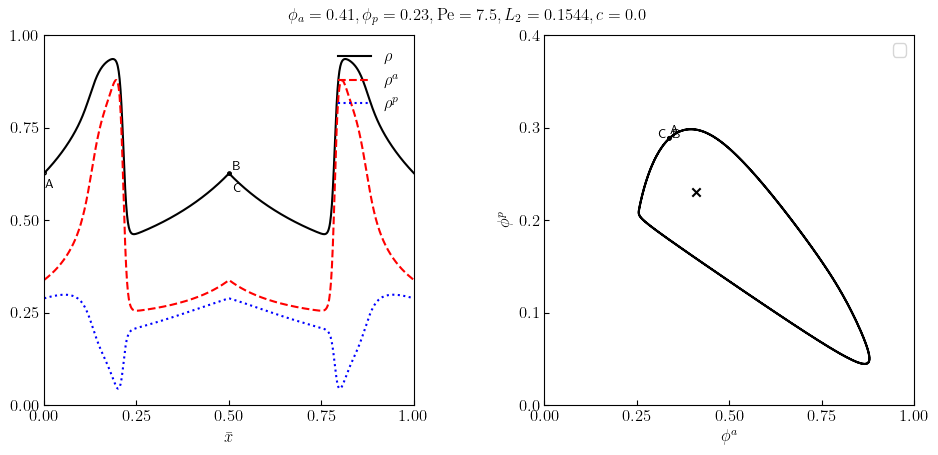

No handles with labels found to put in legend.


In [131]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,f; c=0.0)

In [18]:
function node_sym(f)
    return maximum(f - f[end:-1:1,[2,1,3]])
end

function bond_sym(f)
    return maximum(f + f[end:-1:1,[2,1,3]])
end

bond_sym (generic function with 1 method)

In [94]:
# check sym
print(node_sym(f))
t = 0.0
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt = param
t, f = time_step!(t, f; δt=δt, Nx=Nx, Lx=Lx, DT=DT, v0=v0, DR=DR);
print(node_sym(f))

In [45]:
# create new param
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["name"] = "wave_crash"
param["save_interval"] = 1.0
param["T"] = 200.0;

ts,fs = load_compress_pde(param)
println("sym: ",node_sym(fs[1]))
println("t: ",ts[end])

fast load
sym: 0.0
t: 199.0000000519658


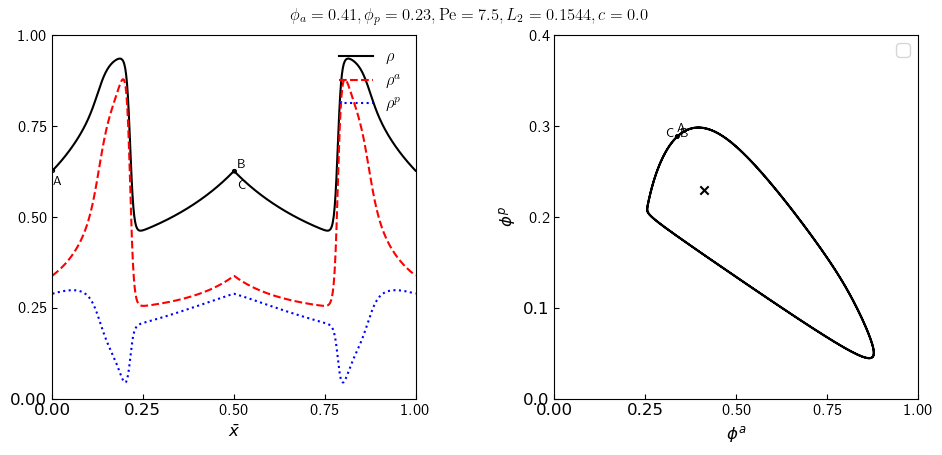

/usr/lib/python3/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


In [43]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,fs[1]; c=0.0)

In [46]:
ts, fs = load_compress_pde(param); 
ns = [f_dot(param,f)[1] for f in fs];
cs = [f_dot(param,f)[2] for f in fs];

fast load


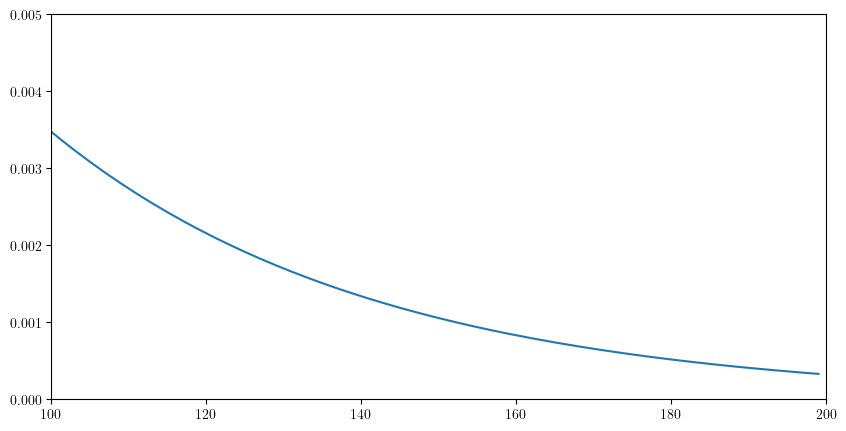

In [47]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(10,5))
rc("text", usetex=true)
ax.plot(ts,ns)
ax.axis([100,200,0,0.005])
display(fig)

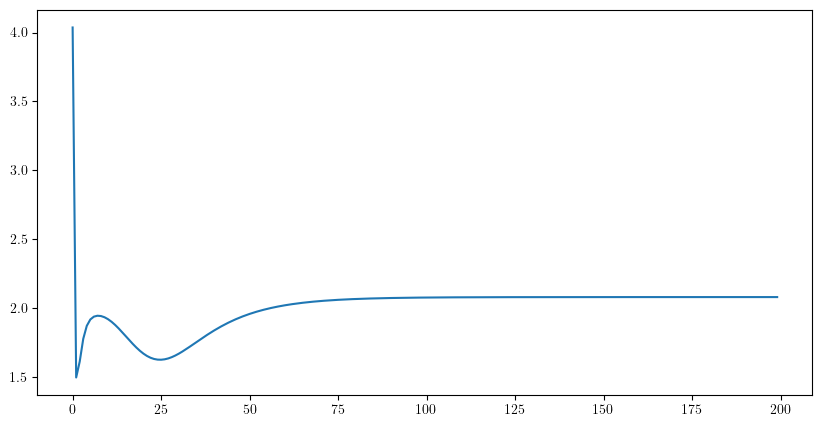

In [48]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(10,5))
rc("text", usetex=true)
ax.plot(ts,cs)
display(fig)

In [13]:
# create new param
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["Lx"] = 2*param["Lx"]
param["Δx"] = param["Lx"]/param["Nx"]
param["name"] = "wave_crash_pert_unif"
param["save_interval"] = 1e-4
param["T"] = 100*param["save_interval"]
param["δ"] = 1e-4
param["pert"] = "double"
@unpack ϕa, ϕp, Nx = param
f = initiate_uniform_pde(ϕa, ϕp, Nx);
f = perturb_pde!(f, param)
println("sym: ",node_sym(f))
println("norm: ",dist_from_unif(f, param))

sym pert: 0.0sym: 0.0
norm: 0.00010000000000000045


In [14]:
run_current_pde(param, 1e-2, f,0.0)
ts, fs = load_compress_pde(param); 
ns = [dist_from_unif(f, param) for f in fs];
cs = [f_dot(param,f)[2] for f in fs];
println("sym: ",node_sym(fs[end]))


full load
saved
sym: 0.0


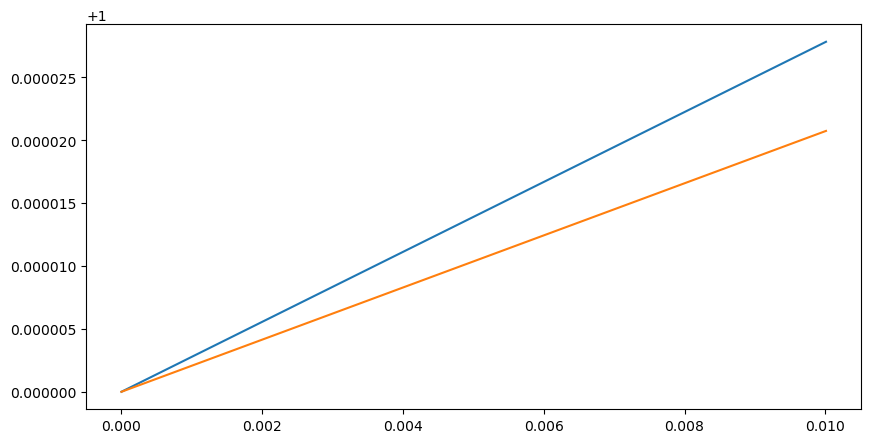

In [15]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(10,5))
ω, λ, λv = lin_pert_values(param)
ax.plot(ts,ns./ns[1]; label= "pde")
ax.plot(ts,exp.(λ*ts); label= "lin")
# ax.axis([100,200,0,0.005])
display(fig)
# fig, ax = subplots(1,1,figsize=(10,5))
# ax.plot(ts,cs)
# display(fig)

In [58]:
# create new param
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["name"] = "wave_crash"
param["save_interval"] = 1.0
param["T"] = 200.0;

ts, fs = load_compress_pde(param); 
f = fs[end] 
println("sym: ",node_sym(f))
println("norm: ",dist_from_unif(f, param))

fast load
sym: 0.0
norm: 0.0003257824116833044


In [59]:
# create new param
param = get_grid_param(12,4)
param["Nx"] = 2*param["Nx"]
param["Lx"] = 2*param["Lx"]
param["Δx"] = param["Lx"]/param["Nx"]
param["name"] = "wave_crash_pert_mid"
param["save_interval"] = 1e-4
param["T"] = 100*param["save_interval"]
param["δ"] = 1e-5
param["pert"] = "double";

In [60]:
f = perturb_pde!(f, param)
println("sym: ",node_sym(f))
println("norm: ",dist_from_unif(f, param))

sym pert: 0.0sym: 0.0
norm: 0.0003322516792805838


In [61]:
run_current_pde(param, 1e-1, f,0.0)
ts, fs = load_compress_pde(param); 
ns = [dist_from_unif(f, param) for f in fs];
cs = [f_dot(param,f)[2] for f in fs];
println("sym: ",node_sym(fs[end]))

fast load
sym: 0.0


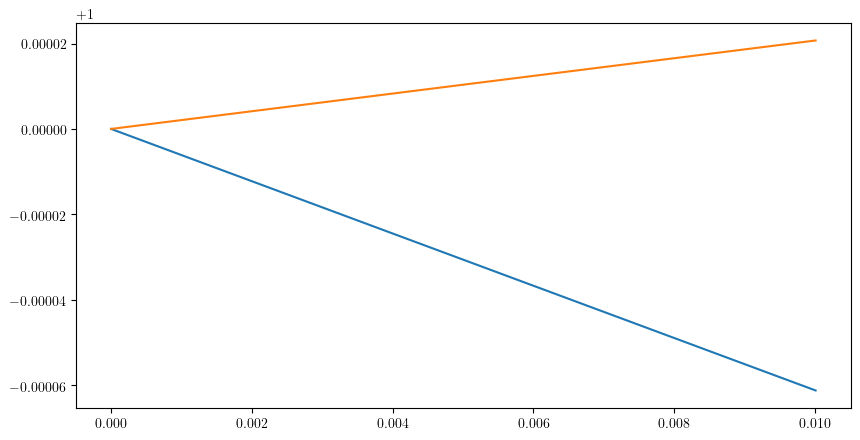

In [62]:
using PyPlot
fig, ax = subplots(1,1,figsize=(10,5))
ω, λ, λv = lin_pert_values(param)
ax.plot(ts,ns./ns[1]; label= "pde")
ax.plot(ts,exp.(λ*ts); label= "lin")
# ax.axis([100,200,0,0.005])
display(fig)

In [63]:
ϕas_left, ϕas_right, ϕps = return_spin(;Pe = 7.5, Δϕ = 0.01)

(Any[0.4570300549025119, 0.4594883505340152, 0.46053287123460557, 0.45641934323728894, 0.4523551719762685, 0.4483429104691174, 0.44438446524645775, 0.44048214292716614, 0.43663894871920517, 0.4328563610727917  …  0.3829414202781868, 0.3814558328394176, 0.380284087999344, 0.37948755799604716, 0.37915097156521366, 0.3793969989382392, 0.38041492965244056, 0.38252627508809856, 0.3863647553640894, 0.39360218703747996], Any[0.9113948119610515, 0.8994549403614375, 0.8873987738532502, 0.8758832144516762, 0.8647659027614091, 0.8536126310222559, 0.8424212695375694, 0.4404828323995005, 0.8199150634025467, 0.8085950601779368  …  0.6042302109595379, 0.5909046250057315, 0.5772815523101392, 0.5632998581085141, 0.5488746528642524, 0.5338831260007691, 0.5181364735629007, 0.5013126408059111, 0.48277833273126153, 0.46086163196071034], Any[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1  …  0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36])

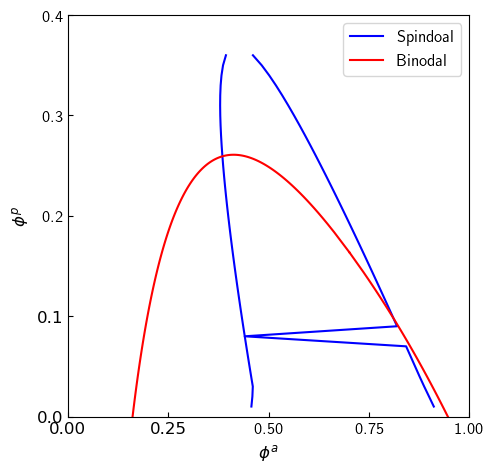

In [2]:
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
rc("text", usetex=true)
plot_phase(fig, ax, 7.5, 12.0; Lxs = [], Δϕ = 0.01)
display(fig)

In [57]:
# ω, λ, λv = lin_pert_values(param)

function relamb(x,y; L = 2.0, v = 7.5, param = param)
    param["ϕa"] = x
    param["ϕp"] = y
    param["Lx"] = L
    param["v0"] = v
    ω, λ, λv = lin_pert_values(param)
    return real(λ)
end
relamb(0.3,0.6;L = 20.0, v = 20.0),relamb(0.3,0.6;L = 2.0, v = 20.0)


(0.12818335615136606, 0.8788467078709905)

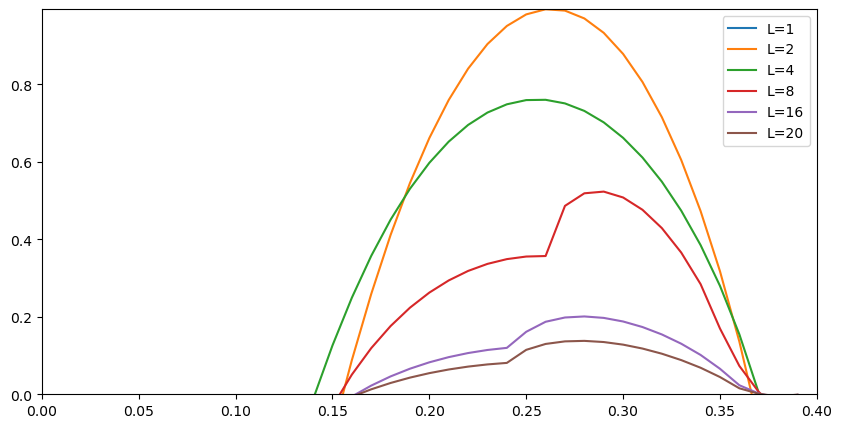

In [63]:
using PyPlot
fig, ax = subplots(1,1,figsize=(10,5))
ϕp = 0.6
v = 20.0
xs = collect(0.01:0.01:(1-ϕp-0.01))
ys = fill(ϕp,length(xs))
ax_lim = 0
for L in [1,2,4,8,16,20]
    λs = relamb.(xs,ys; L=L, v=v)
    ax_lim = max(ax_lim, maximum(λs))
    ax.plot(xs,λs; label = "L=$(L)")
end
ax.axis([0,1-ϕp,0.0,ax_lim])
ax.legend()
display(fig)


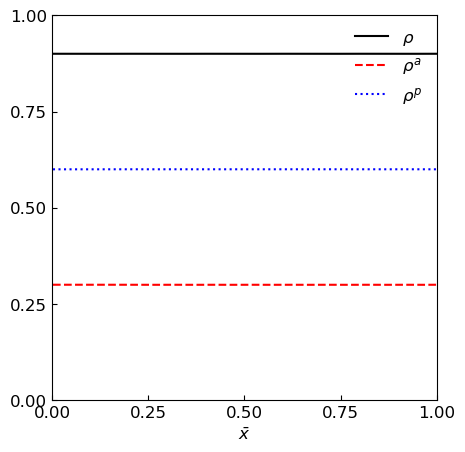

In [82]:
param = get_grid_param(12,4)
param["ϕa"] = 0.3
param["ϕp"] = 0.6
param["Lx"] = 20.0
param["v0"] = 20.0
param["δ"] = 0.0001
param["Δx"] = param["Lx"]/param["Nx"]
@unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt,δ = param
f = initiate_uniform_pde(ϕa, ϕp, Nx);
f = perturb_pde!(f, param; wave_num = 10);
fig, ax = subplots(1,1,figsize=(10,5))
profile_f(ax,12,param,f);
ϕ = ϕa + ϕp
# ax.set_aspect(1/8/δ)
# ax.axis([0,1,ϕa-4*δ,ϕa+4*δ])
ax.axis([0,1,0,1])
display(fig)

In [129]:
# dt = 10.0
# param["save_interval"] = 1e-2
param["T"] = 80.0
# run_current_pde(param,dt, f,0.0)
t_saves, f_saves = load_compress_pde(param);
norm_saves = dist_from_unifs(f_saves, param);

full load
saved


In [4]:
param = get_grid_param(12,4)
param["ϕa"] = 0.5
param["ϕp"] = 0.1
param["Lx"] = 20.0
param["v0"] = 20.0
param["δ"] = 0.01
param["Δx"] = param["Lx"]/param["Nx"]
param["save_interval"] = 0.01
param["T"] = 40.0
t_saves, f_saves = load_compress_pde(param);
# norm_saves = dist_from_unifs(f_saves, param);


fast load


4000-element Vector{Float64}:
 9.999999999999808e-5
 0.00010965883678817369
 0.00012013220233540035
 0.00013151452440083696
 0.00014388461852116627
 0.00015736589526532143
 0.00017205291840427801
 0.0001880606857887362
 0.00020551372742751958
 0.00022456702258919384
 ⋮
 0.39400251951461224
 0.39400254280450203
 0.39400256605573325
 0.3940025892683714
 0.39400261244248197
 0.3940026355781304
 0.3940026586753817
 0.39400268173430103
 0.39400270475495336

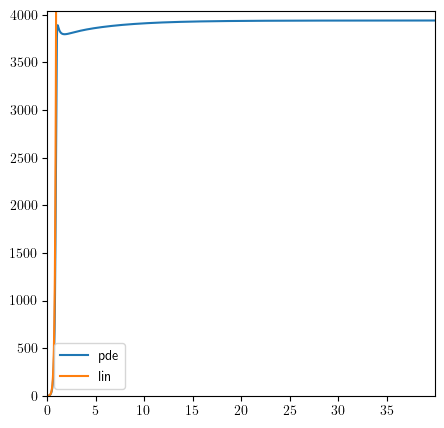

In [19]:
using PyPlot 
fig, ax = subplots(1,1,figsize=(5,5))
ω, λ, λv = lin_pert_values(param;wave_num =10,wave_choice=3)
ax.plot(t_saves,norm_saves./norm_saves[1]; label= "pde")
ax.plot(t_saves,exp.(real(λ)*t_saves); label= "lin")
ax.legend()
ax.axis([0,t_saves[end],0,norm_saves[end]./norm_saves[1]+100])
display(fig)

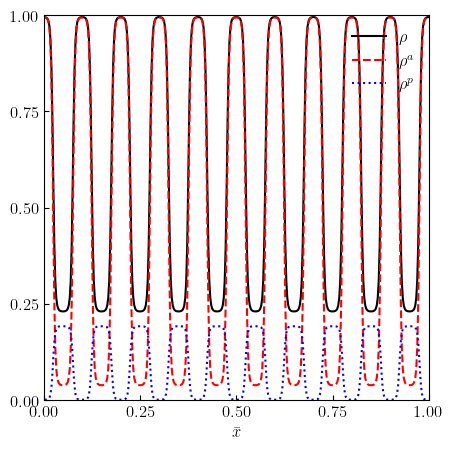

In [31]:
f = f_saves[end]
fig, ax = subplots(1,1,figsize=(10,5))
profile_f(ax,12,param,f);
# ϕ = ϕa + ϕp
# ax.set_aspect(1/8/δ)
# ax.axis([0,1,ϕa-4*δ,ϕa+4*δ])
display(fig)

In [32]:
function perturb_safe_pde!(f::Matrix{Float64}, param::Dict{String, Any}; wave_num = 1)
    @unpack DT, v0, DR, Δx, Lx, ϕa, ϕp, T , name, Nx, save_interval, save_on, δt, δ, pert = param
    
    if pert == "rand"
        pertf = 2*rand(Nx,3) .-1
    elseif pert == "double"
        ω, value, vector = lin_pert_values(param;wave_num = wave_num,wave_choice=3)

        wave   = exp.((1:Nx)*(wave_num*im*2*π/Nx))
        pertf  = zeros(Nx,3)

        pertf[:,1] = real.( wave*(vector[2]- vector[3])/2 )
        pertf[:,2] = real.( wave*(vector[2]+ vector[3])/2 ) 
        pertf[:,3] = real.( wave*(vector[1]-vector[2]) )

        # ω, value, vector = lin_pert_values(param;wave_num = wave_num,wave_choice=2)

        # wave   = exp.(-(1:Nx)*(wave_num*im*2*π/Nx))
        # pertf  = zeros(Nx,3)

        # pertf[:,1] = real.( wave*(vector[1]- vector[2])/2 )
        # pertf[:,2] = real.( wave*(vector[1]+ vector[2])/2 ) 
        # pertf[:,3] = real.( wave*(vector[3]) )
        
        pertf += pertf[end:-1:1,[2,1,3]]

        print("sym pert: $(node_sym(pertf))")
    else
        ω, value, vector = lin_pert_values(param;wave_num = wave_num)

        wave   = exp.((1:Nx)*(wave_num*im*2*π/Nx))
        pertf    = zeros(Nx,3)

        pertf[:,1] = real.( wave*(vector[2]- vector[3])/2 )
        pertf[:,2] = real.( wave*(vector[2]+ vector[3])/2 ) 
        pertf[:,3] = real.( wave*(vector[1]-vector[2]) )

        println("max pert")
    end

    c = norm(pertf)/sqrt(Nx)

    max_pert = maximum(δ*sum(pertf;dims=2)/c)
    max_f = maximum(sum(f;dims=2))
    min_f = minimum(sum(f;dims=2))
    ϵ = min(1e-5,(1-max_f)/2)
    if max_pert>(1-(max_f))
        sf = (1-(max_f)-ϵ)/max_pert
    elseif max_pert>(min_f)
        sf = ((min_f-ϵ))/max_pert
    else
        sf = 1
    end

    f += sf*δ*pertf/c

    return f
end

perturb_safe_pde! (generic function with 1 method)

In [33]:
param["Δx"] = param["Lx"]/param["Nx"]
param["δ"] = 0.01
param["T"] = 40.0
println(maximum(sum(f;dims=2)), minimum(sum(f;dims=2)))
f = perturb_safe_pde!(f, param; wave_num = 1);
println(maximum(sum(f;dims=2)), minimum(sum(f;dims=2)))

0.9946609831022370.23026236594377858
max pert
0.999990.2251941696977141


In [35]:
param["name"] = "coarsening_test"
# run_current_pde(param,40.0, f,0.0)

(40.00000311961679, [0.5158374003475107 0.47789177198283506 0.0008561016931184258; 0.541963104392763 0.451195685881055 0.0009519075057672487; … ; 0.47789177198283234 0.5158374003475134 0.0008561016931184294; 0.4969440988813878 0.49694409888139024 0.0008297014604226515])

In [6]:
param = get_grid_param(12,4)
param["ϕa"] = 0.5
param["ϕp"] = 0.1
param["Lx"] = 20.0
param["v0"] = 20.0
param["save_interval"] = 0.01
param["Δx"] = param["Lx"]/param["Nx"]
param["δ"] = 0.01
param["T"] = 40.0
param["name"] = "coarsening_test"
ts,fs = load_compress_pde(param)

fast load


([0.0, 0.010004843334113153, 0.020002665049952403, 0.030004616123684106, 0.040001452976813956, 0.05000216851910409, 0.06000125948235993, 0.07000376647116996, 0.08000718656914033, 0.09000119174483168  …  39.90000002609302, 39.9100065342242, 39.92000419363731, 39.93000185182032, 39.940008356256776, 39.950006011978644, 39.96000366647056, 39.97000131973258, 39.9800078192439, 39.99000547004521], [[0.5202276917642373 0.47843273782442386 0.0011811584507798226; 0.5487691155916075 0.4492655649063771 0.001275290913963817; … ; 0.47843273782442386 0.5202276917642373 0.0011811584507798228; 0.4994168958027366 0.4994168958027366 0.0011562083945267669], [0.5193141042031563 0.4780373362296208 0.0011797020632881286; 0.5476357684274621 0.44875137289274425 0.0012732227613805008; … ; 0.4780373362296208 0.5193141042031563 0.0011797020632881288; 0.4988278329718726 0.4988278329718726 0.001154730587515848], [0.5185876068145344 0.4775132453307045 0.0011781117054032123; 0.5469266817287604 0.4483082378478767 0.00

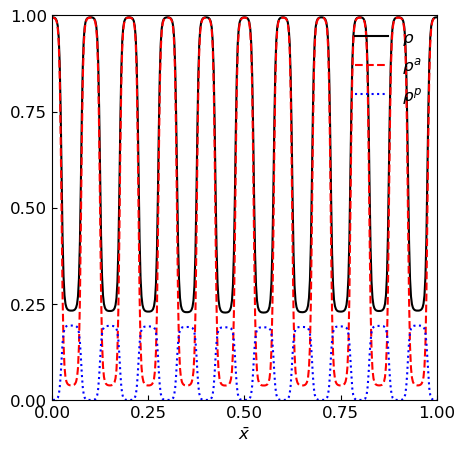

In [7]:
f = fs[end]
using PyPlot
fig, ax = subplots(1,1,figsize=(10,5))
profile_f(ax,12,param,f);
# ϕ = ϕa + ϕp
# ax.set_aspect(1/8/δ)
# ax.axis([0,1,ϕa-4*δ,ϕa+4*δ])
display(fig)

full load
saved


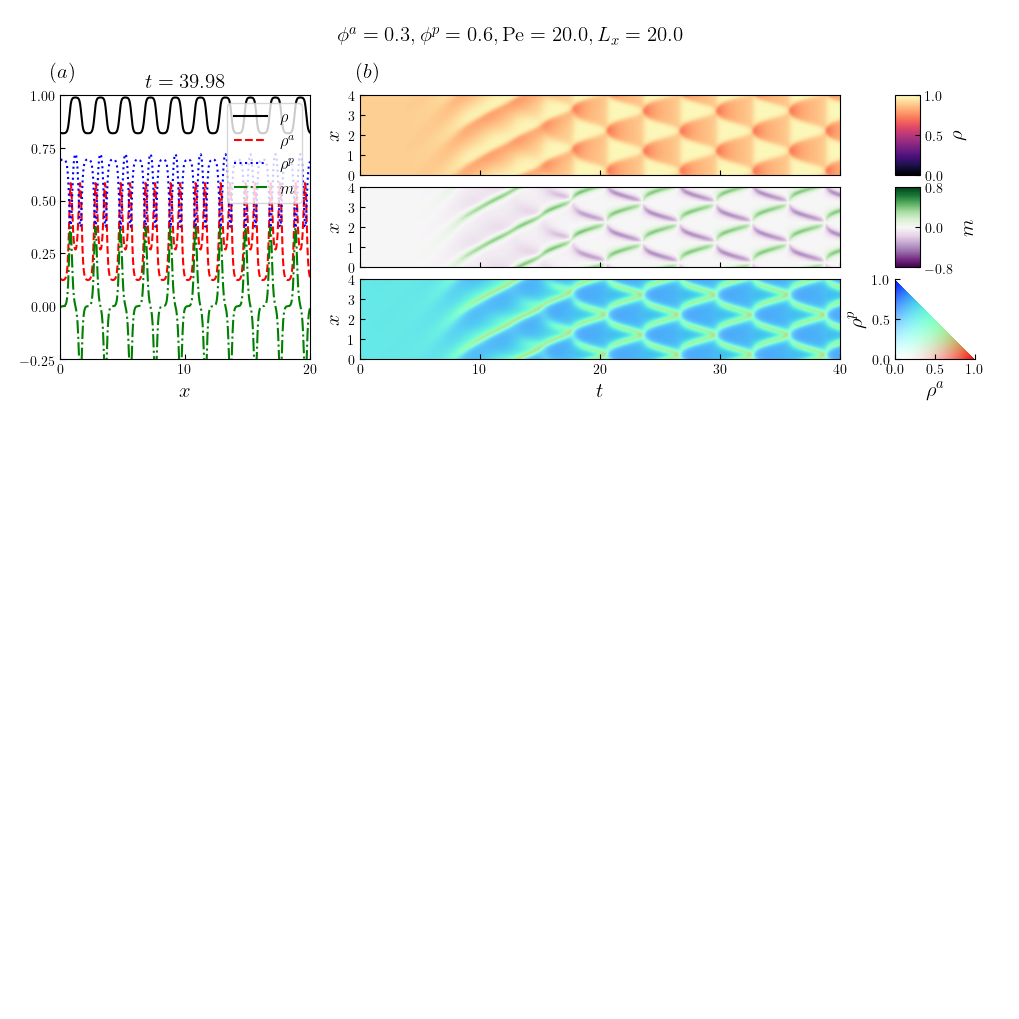

In [131]:
@unpack Nx = param
using KernelDensitySJ, Peaks

#load saves
ts, f_saves = load_compress_pde(param);
#process
    ft      = permutedims(reshape(reduce(hcat,f_saves),(Nx,3,:)),(3,1,2))
    # ft      = ft[t_start:1:t_end, : ,: ]
    # ts      = ts[t_start:1:end]
    pk      = find_xpeak_ft(ts , ft; time_length = 0.1)
    centre  = Nx ÷ 2 + 1 
    ft  = circshift(ft, (0,-pk, 0));

    t_pde_rgb_image = rho_to_rgb(ft);
    dt, df = t_dff(ts , ft; N=Nx);

    fts = [ft]
    times = [ts]
    images = [t_pde_rgb_image]
    dts = [dt]
    dfs = [df];

t_max = maximum(ts)
@unpack Lx = param
    rhomax  = 1.0
    rhomin  = 0.0
    mag_lim = 0.8
    height_1 = 0.08
    width_1  = 0.48 #2*0.365
    side_gap_1  = 0.35
    bottom_gap_1  = 0.65
    gap = 0.012

    cbar_y_top = bottom_gap_1 + 3*height_1 + 2*gap
    cbar_width = 0.1
    cbar_y_bot = bottom_gap_1+ gap+ height_1#bottom_gap_1 + cbar_width + 0.02
    cbar_x = 0.885 #1- cbar_width#2*width_1+ 3*side_gap_1


    height_2 = 0.175
    width_2  = height_2
    side_gap_2  = 0.1
    bottom_gap_2  = bottom_gap_1
    gap_2 = 0.06

    t_stamp_x = 0.03
    t_stamp_y = 0.05

    width_3 = 0.25
    start_3 = 0.05

    font = 15

    sf = 1.0
#create plot
    using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig = plt.figure(figsize=(10,Int64(10*sf)))
    ax = fig.add_axes([0,0,1,1],visible=true)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.spines["bottom"].set_visible(false)
    ax.spines["left"].set_visible(false)
    # ax = fig.add_axes([0.775,0,0.225,1],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
    # ax = fig.add_axes([0.025,0.5,0.95,0.45],visible=true)
    # ax.xaxis.set_ticks([])
    # ax.yaxis.set_ticks([])
# add image
    for (i,(rgb_image,ts)) in enumerate(zip(images, times))
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        ax.imshow(rgb_image; extent = [t_start,t_end,0,Lx], interpolation = "bilinear")
        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.get_yaxis().set_ticks(0:1:Lx/5)
        # ax.set_yticklabels(["0","10","20"])
        ax.get_xaxis().set_ticks([])
        ax.axis([0,t_max, 0, Lx/5])
        ax.set_aspect((5*t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.set_xlabel(L"t", fontsize = font)
        ax.tick_params(labelbottom = true, direction = "in")
    end
# add mats
    for (i,(ts,ft)) in enumerate(zip(times, fts))
        global im1, im2
        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1), bottom_gap_1+2*height_1+2*gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]
        t_max = t_end -t_start
        _, Nx, _ = size(ft)

        colmap = PyPlot.plt.cm.magma
        norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
        im1 = ax.matshow((ft[:,Nx:-1:1,1]+ft[:,Nx:-1:1,2]+ft[:,Nx:-1:1,3])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])

        #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        ax.xaxis.set_ticks([])
        ax.xaxis.tick_bottom()
        ax.get_yaxis().set_ticks(0:1:Lx/5)
        # ax.set_yticklabels(["0","10","20"])
        ax.axis([0,t_max, 0, Lx/5])
        ax.set_aspect((5*t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")

        ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1+height_1+gap, width_1, height_1])
        t_end = ts[end]
        t_start = ts[1]

        colmap = PyPlot.plt.cm.PRGn
        norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
        im2 = ax.matshow((ft[:,Nx:-1:1,2]-ft[:,Nx:-1:1,1])'; norm = norm1,  cmap = colmap, extent = [t_start,t_end,0,Lx])
        
        ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
        # ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks(0:1:Lx/5)
        # ax.set_yticklabels(["0","10","20"])
        ax.xaxis.tick_bottom()
        ax.axis([0,t_max, 0, Lx/5])
        ax.set_aspect((5*t_max/Lx)*(height_1/width_1)*sf)
        ax.set_ylabel(L"x",fontsize = font, rotation = 90)
        ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
        ax.tick_params(labelbottom = false, direction = "in")
    end
# add tdiff
    #     for (i,(ts, df)) in enumerate(zip(dts, dfs))
    #         ax = fig.add_axes([side_gap_1+(i-1)*(side_gap_1+width_1),bottom_gap_1-height_1-gap, width_1, height_1])
    #         t_end = ts[end]
    #         t_start = ts[1]
    #         t_max = t_end -t_start
    #         ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # if i ==1
    #         #     smooth_df = KernelDensitySJ.smooth(ts[2:end],df[2:end],0.2, ts[2:end])
    #         #     ax.plot(ts[2:end], smooth_df; color = "black")
    #         # else
    #         #     ax.plot(ts[2:end], df[2:end]; color = "black")
    #         # end
    #         #ax.get_xaxis().set_ticks(0:round(0.1*round(t_end); digits = 1):round(ts[end]))
            
    #         #ax.get_xaxis().set_ticks([])
    #         ax.get_xaxis().set_ticks(0:round(0.25*round(t_max); digits = 0):round(t_max;digits = 0 ))
    #         ax.get_yaxis().set_ticks(0:0.04:0.04)
    #         ax.axis([t_start,t_end, 0, 0.04])
    #         ax.set_aspect((t_max/0.04)*(height_1/width_1)*sf)
    #         ax.set_ylabel(L"\Vert \dot f \Vert_2",fontsize = 15, rotation = 90)
    #         ax.set_xlabel(L"t", fontsize = font)
    #         ax.tick_params(labelbottom = true, direction = "in")
    # end
# add end plot  
    frame = length(ts)-1
    ax = fig.add_axes([start_3, bottom_gap_2, width_3, 3*height_1+2*gap])
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]+ft[frame,:,1]+ft[frame,:,3];
    color = "black", linestyle = "-", label = L"\rho")
    ax.plot(Δx:Δx:Lx, ft[frame,:,1]+ft[frame,:,2]; 
    color = "red", linestyle = "--", label = L"\rho^a")
    ax.plot(Δx:Δx:Lx, ft[frame,:,3]; 
    color = "blue", linestyle = ":",label = L"\rho^p")
    ax.plot(Δx:Δx:Lx, ft[frame,:,2]-ft[frame,:,1]; 
    color = "green", linestyle = "-.", label = L"m")
    

    latex_string = latexstring("\$ t = $(d2(ts[frame]))\$")
    ax.set_title(latex_string, fontsize = font)
    ax.get_xaxis().set_ticks(0:10.0:Lx)
    ax.get_yaxis().set_ticks(-0.25:0.25:1.0)
    # ax.set_xlabel(L"x", fontsize = 15)
    #ax.set_ylabel(L"m",fontsize = font, rotation = 90)
    ax.set_aspect((3*height_1+2*gap)*(Lx/(1.25))/(width_3))
    ax.axis([0,Lx,-0.25,1.0])
    ax.tick_params(direction = "in")
    ax.legend(loc= "upper right", fontsize = 12)
    ax.set_xlabel(L"x", fontsize = 15)

# add colour bars
    # ap cbar
    # cbar_ax = fig.add_axes([cbar_x, bottom_gap_1, cbar_width, cbar_width])
    cbar_ax = fig.add_axes([cbar_x, bottom_gap_2, height_1, height_1])

    Δ = 0.001
    cbar_f = [ x*(x+y≤ 1)*(i != 3)/2 + y*(x+y≤ 1)*(i == 3) for x in Δ:Δ:1, y in Δ:Δ:1, i in 1:3 ]  
    rgb_image = rho_to_rgb(cbar_f );

    ax = cbar_ax
    ax.imshow(rgb_image; extent = [0,1,0,1])
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    ax.get_xaxis().set_ticks(0:0.5:1)
    ax.get_yaxis().set_ticks(0:0.5:1)
    ax.set_xlabel(L"\rho^a", fontsize = font)
    ax.set_ylabel(L"\rho^p",fontsize = font, rotation = 90)
    ax.tick_params(direction = "in")
    # rho cbar
    # rho_cbar_ax = fig.add_axes([0.9, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    rho_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot+gap+height_1, 0.025, height_1])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    # rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar_ax.set_ylabel(L"\rho",fontsize=font,rotation = 90)
    rho_cbar.set_ticks( rhomin:0.5:rhomax)
    rho_cbar_ax.yaxis.set_ticks_position("right")
    rho_cbar_ax.tick_params(direction = "in")
    # mag cbar
    # mag_cbar_ax = fig.add_axes([0.935, cbar_y_bot, 0.025, (cbar_y_top-cbar_y_bot)])
    mag_cbar_ax = fig.add_axes([cbar_x, cbar_y_bot, 0.025, height_1])
    # mag_cbar_ax.set_title(L"{m}",fontsize=25) #mathbf{}
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-mag_lim):0.8:mag_lim)
    mag_cbar_ax.tick_params(direction = "in")
    mag_cbar_ax.yaxis.set_ticks_position("right")
    mag_cbar_ax.set_ylabel(L"m",fontsize=font,rotation = 90)
#
#title
    @unpack v0, ϕa, ϕp, Lx = param
    latex_title = latexstring("\$ \\phi^a = $(ϕa), \\phi^p = $(ϕp), \\mathrm{Pe} = $(v0), L_x = $(Lx)\$")
    fig.suptitle(latex_title,fontsize=font)
# labels
    #latex_annotation = latexstring("\$ t = $(round( times[1][end];digits = 1))\$")
    ax.annotate(L"(a)", (start_3, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
    ax.annotate(L"(b)", (side_gap_1, bottom_gap_2+3*height_1+2*gap+0.01), xycoords = "figure fraction", rotation = 0, fontsize = font )
display(fig)
fig_name = "pde_plot"
     @unpack ϕa, ϕp, v0, Lx = param
     pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)";
     mkpath(pathname)
     filename = "/store/DAMTP/jm2386/Active_Lattice/plots/pm_figs/$(fig_name)/ϕa=$(ϕa)_ϕp=$(ϕp)_v0=$(v0)_Lx=$(Lx).pdf";
     PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)


In [ ]:
dt = 40.0
f = f_saves[end]
t = t_saves[end]
param["pert"] = "rand"
param["δ"] = 0.1
f = perturb_pde!(f, param);
param["save_interval"] = 1e-2
param["T"] = param["T"]+dt
# run_current_pde(param,dt, f,t)
t_saves, f_saves = load_compress_pde(param);
norm_saves = dist_from_unifs(f_saves, param);